#### **Project Overview**

* Built a classifier model and detected residents from 23 districts of Assam who might be at a higher risk of stroke.
* Downloaded over 140,000+ observations of Assam Health Survey Data with 53 unique features from https://data.gov.in/ to perform classification on.
* Cleaned, explored and manipulated the entire dataset extensively on Python to make it usable for our model.
* Engineered new features and performed deep exploration and statistical tests on the data.
* Used 2 different datasets from separate sources to train the stroke risk classifier model.
* Applied Synthetic Minority Over-sampling Technique (SMOTE) and various other methods to overcome extreme imbalance ( 1.8% Minority Proportion ) in the stroke risk dataset before modelling the classifier.
* Built a model that was able to detect the minority class with 75% accuracy.


#### **Potential Uses**

* People classified under risk category can be reached out to spread awareness, provide diagnostic tools, medical help, etc. to help them take care of their health.
* The information can be used by insurance companies, health diagnostic companies, pharma companies, hospitals, etc. to directly reach out and find potential clients who might buy their products and services in the future.


#### **Project Description**

A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off. Strokes are a medical emergency and urgent treatment is essential. But if a person is made aware of the risk and starts taking precautions and makes lifestyle changes, strokes can be prevented significantly.

According to CDC, USA ([Source](https://www.cdc.gov/stroke/facts.htm#:~:text=Every%20year%2C%20more%20than%20795%2C000,are%20first%20or%20new%20strokes.&text=About%20185%2C000%20strokes%E2%80%94nearly%201,have%20had%20a%20previous%20stroke.&text=About%2087%25%20of%20all%20strokes,to%20the%20brain%20is%20blocked.)),

> Every year, more than 795,000 people in the United States have a stroke. About 610,000 of these are first or new strokes. About 185,000 strokes—nearly 1 of 4—are in people who have had a previous stroke.

In this project we will be building a classifier model to detect residents from 23 districts of Assam who might be at a higher risk of stroke.

This can be very beneficial for the residents as they can be more self-aware and start taking preventative measures and make lifestyle changes.

On the other hand, this can also work as a very crucial piece of information for insurance companies, health diagnostic companies, pharma companies, hospitals, etc. to directly reach out to and maybe find potential clients.

We will be using multiple datasets of each individual districts downloaded from https://data.gov.in and concatenating them together into one dataset for our use case. We will also be using 2 separate datasets, heart disease risk data and stroke risk data from separate sources to build our Stroke Risk Classifier model.

It would also be interesting to explore other features of the Assam Health Survey dataset for both the stroke risk and non-risk groups and see if there are any differences or points of interest among them.


In [82]:
# we import some initial necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [84]:
# imported our functions
import sys
sys.path.append("Functions/")
import functions as func

We will be using 3 datasets for our use case, namely, Heart Risk Dataset, Stroke Risk Dataset and Assam Health Survey Dataset.

#### **Heart Risk Dataset**

The dataset for heart risk classification is created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations,
Duplicated: 272 observations,
Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link:

[Link](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)


In [85]:
# we import the heart risk dataset
hdf = pd.read_csv("model_datasets\heart_risk_data_raw.csv")
hdf.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


The dataset came with the following features:

1. Age
2. Sex
3. ChestPainType
4. RestingBP
5. Cholesterol
6. FastingBS
7. RestingECG
8. MaxHR
9. ExerciseAngina
10. Oldpeak
11. ST_Slope
12. HeartDisease

Univariate Stats First Glance

In [86]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(hdf)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
FastingBS,int64,True,918,0,2,0,0.23,0,0.0,0.0,0.0,1,0.42,1.26,-0.4
Oldpeak,float64,True,918,0,53,0.0,0.89,-2.6,0.0,0.6,1.5,6.2,1.07,1.02,1.2
RestingBP,int64,True,918,0,67,120,132.4,0,120.0,130.0,140.0,200,18.51,0.18,3.27
MaxHR,int64,True,918,0,119,150,136.81,60,120.0,138.0,156.0,202,25.46,-0.14,-0.45
Age,int64,True,918,0,50,54,53.51,28,47.0,54.0,60.0,77,9.43,-0.2,-0.39
HeartDisease,int64,True,918,0,2,1,0.55,0,0.0,1.0,1.0,1,0.5,-0.22,-1.96
Cholesterol,int64,True,918,0,222,0,198.8,0,173.25,223.0,267.0,603,109.38,-0.61,0.12
Sex,object,False,918,0,2,M,-,-,-,-,-,-,-,-,-
ExerciseAngina,object,False,918,0,2,N,-,-,-,-,-,-,-,-,-
RestingECG,object,False,918,0,3,Normal,-,-,-,-,-,-,-,-,-


#### **Exploration & Cleaning**

##### Sex

We plotted the data in the feature "Sex" on a bar graph to try to visually interpret the information.


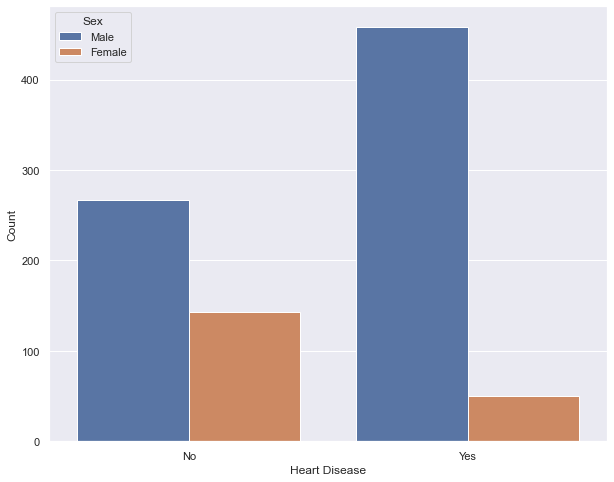

In [87]:
sns.countplot(x=hdf["HeartDisease"].apply(lambda x: "Yes" if x == 1 else "No"), hue = hdf["Sex"])
plt.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

We see that ratio of Males is predominantly higher than Females in our data and also Males are significantly more prone to heart disease than Females.

In [88]:
# we create dummies for "Sex" column
hdf["Sex"] = hdf["Sex"].apply(lambda x: 1 if x == "M" else 0)

##### RestingBP

In [89]:
# we check for a observation with corrupted information on RestingBP
hdf[hdf["RestingBP"] <= 70]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [90]:
# we drop the observation
hdf.drop([449], axis=0, inplace=True)

We detected a discrepancy with this particular feature in the dataset.

According to Centre of Disease Control and Prevention ( [Source](https://www.cdc.gov/bloodpressure/about.htm#:~:text=Blood%20pressure%20is%20measured%20using,your%20heart%20rests%20between%20beats.)),

“Blood pressure is measured using two numbers: The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.”

But upon exploring the information provided in our dataset by checking its measures of central tendency and distribution plot, we see that we are given the systolic blood pressure and not the diastolic blood pressure as the feature name implies.


Mean: 132.54089422028352
Median: 130.0
Mode: 120


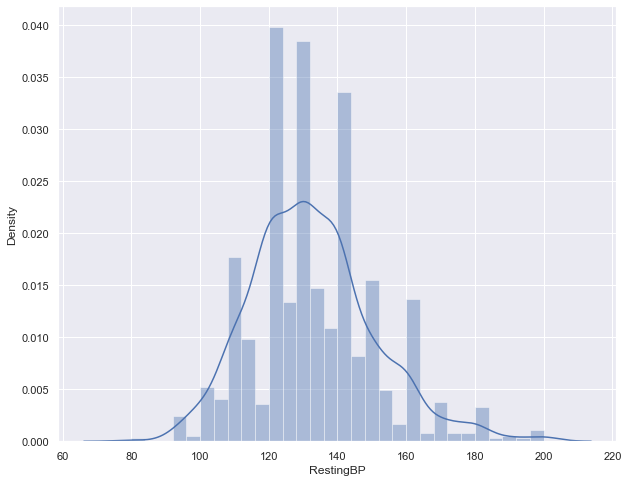

In [91]:
print("Mean:", hdf["RestingBP"].mean())
print("Median:", hdf["RestingBP"].median())
print("Mode:", hdf["RestingBP"].mode()[0])
sns.distplot(hdf["RestingBP"])
plt.show()

So, we proceeded to classify everyone with the assumption that it is systolic blood pressure with anyone above 140 as hypertensive in accordance with the guidelines from the CDC website provided above.

In [92]:
# we create a column to classify hypertension from the blood pressure measurements (we assume as systolic BP)
hdf["hypertension"] = hdf["RestingBP"].apply(lambda x: 1 if x >= 140 else 0)

We plot the information on a bar graph to try to visually interpret the information.

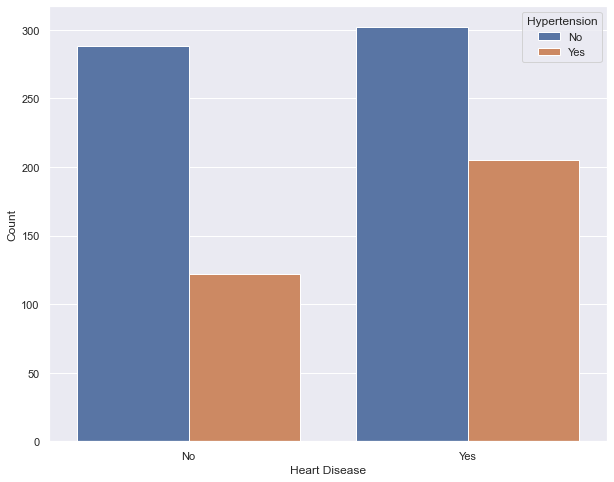

In [93]:
sns.countplot(x=hdf["HeartDisease"].apply(lambda x: "Yes" if x == 1 else "No"), hue = hdf["hypertension"])
plt.legend(title='Hypertension', loc='upper right', labels=['No', 'Yes'])
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

We see that people with hypertension are more prone to having heart disease compared to people without hypertension.

##### Age

We create bins of 10 years and plot them on a bar graph to visually interpret the information.

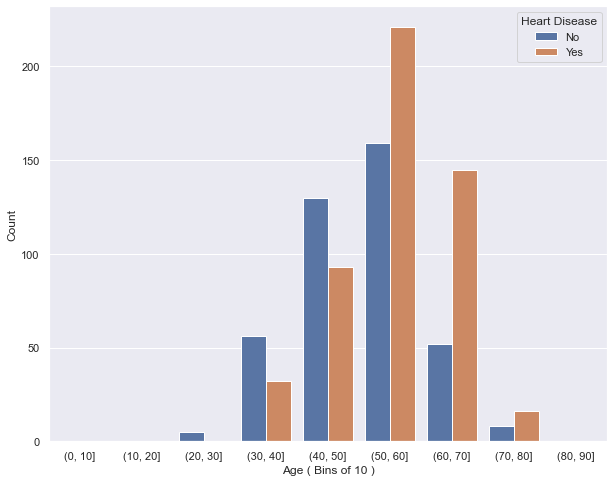

In [94]:
# we plot the age bins on a bar graph to visually explore the data in the feature
hdf["Age_bins"] = pd.cut(hdf["Age"], bins=[0,10,20,30,40,50,60,70,80,90])
sns.countplot(x=hdf["Age_bins"], hue=hdf["HeartDisease"])
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.xlabel("Age ( Bins of 10 )")
plt.ylabel("Count")
plt.show()

We can see that majority of our data is of people from 30 to 80 years of age and the people of higher age ( 50+ ) are more susceptible to heart disease.

**We keep a note about this going forward as we only want to use classification in people between 30 to 80 years of age.**

In [95]:
# we drop the features that we dont have information to in our assam health survey dataset
hdf.drop(["ChestPainType", "Cholesterol", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "RestingBP", "Age_bins"], axis=1, inplace=True)

#### **Testing**

We check the correlation of our relevant features with each other and plot them on a heatmap.

In [96]:
# we check the correlation of the features among each other
hdf.corr()

,Age,Sex,FastingBS,HeartDisease,hypertension
Age,1.000000,0.055670,0.198170,0.282012,0.226031
Sex,0.055670,1.000000,0.120424,0.305118,0.043693
FastingBS,0.198170,0.120424,1.000000,0.267994,0.052146
HeartDisease,0.282012,0.305118,0.267994,1.000000,0.110836
hypertension,0.226031,0.043693,0.052146,0.110836,1.000000


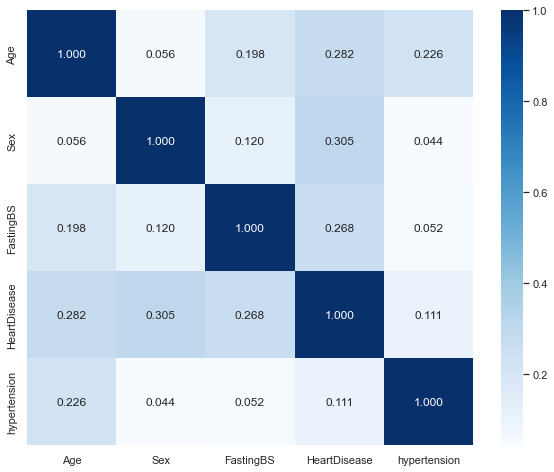

In [97]:
# we plot the correlation on a heatmap for better understanding
sns.heatmap(hdf.corr(), annot=True, fmt=".3f", cmap="Blues")
plt.show()

We see most of our features have relatively reliable correlation with our target variable.

#### **Modelling**

In [98]:
# we import the required Machine Learning libraries to build our Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

We start our modelling process by scaling our data and splitting it into training and testing sets.

In [99]:
# we scale our dataset for ML model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hdf.drop(columns=["HeartDisease"]))
y = hdf["HeartDisease"]

In [100]:
# we split and create the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=45)

We decided to use k-nearest neighbors (KNN) classifier to build our classifier model because our dataset is small and simple and the classifier is easy to implement and intuitive to understand. Also, because our data has been cleaned of outliers which could cause issues in KNN Classifier, thus it made it even more suitable to use KNN to produce reliable results.

We fit our training data on the default KNN Classifier with 5 nearest neighbors and evaluate our performance as baseline.

In [101]:
# we fit the data on our classifier with default hyper parameters and evaluate the scores
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(classification_report(y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59        82
           1       0.68      0.79      0.73       102

    accuracy                           0.67       184
   macro avg       0.67      0.66      0.66       184
weighted avg       0.67      0.67      0.67       184



Then, we decide to run a For-Loop to find the optimal value of nearest neighbors that gives the best accuracy scores on our testing set and subsequently plot the results on a line graph along with the number of neighbors which gives the best accuracy score.

In [102]:
counter = []
testlist = []
for i in range(1, len(X_train)):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    testlist.append(knn_model.score(X_test, y_test))
    counter.append(i)
testdict = dict(zip(counter, testlist))

1 Max Accuracy Score= 0.7391304347826086 
Number of Neighbors= 16
2 Max Accuracy Score= 0.7391304347826086 
Number of Neighbors= 18


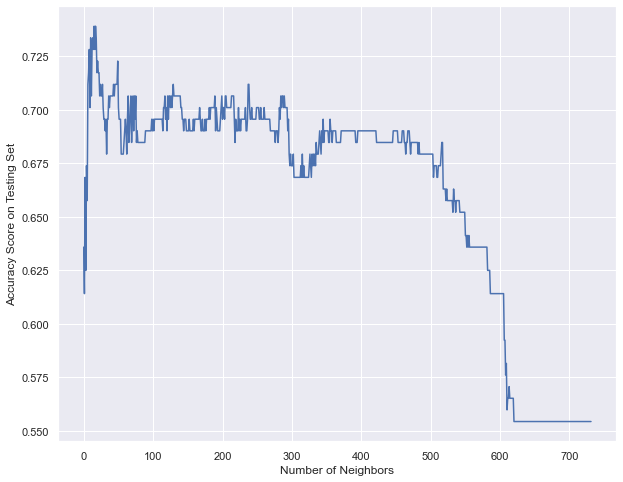

In [103]:
# we plot the results and run a simple for-loop to find the no of neighbors of the max accuracy score
plt.plot(testdict.values())
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy Score on Testing Set");

count = 0
for key, value in testdict.items():
         if max(testdict.values()) == value:
             count += 1
             print(str(count), "Max Accuracy Score=",value,"\nNumber of Neighbors=",key)

We see that 16 and 18 number of neighbors gave the best accuracy score on the testing set. We decided to use either of them ( 18 in our case ) to fit our training data and evaluated the performance on the testing dataset.

In [104]:
# we fit the knn model with optimal neighbors and evaluate performance
knn_model= KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train, y_train)
y_pred= knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66        82
           1       0.72      0.87      0.79       102

    accuracy                           0.74       184
   macro avg       0.75      0.72      0.72       184
weighted avg       0.75      0.74      0.73       184



We see that there is a significant improvement in performance compared to baseline especially in detection(recall) and precision scores.
Hence, we decided to save this classifier and proceeded next to our Stroke Risk Dataset.

In [105]:
heart_model= KNeighborsClassifier(n_neighbors=18)
heart_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=18)

#### **Stroke Risk Dataset**

The dataset for stroke risk classification is sourced from [Link](https://data.mendeley.com/datasets/x8ygrw87jw/1)

This dataset is extremely imbalanced with a 1 : 55 minority to majority class ratio and comes with a total of 43400 observations. We will be applying various measures to balance the dataset going forward.
The dataset came with the following features:
1. id
2. gender
3. age
4. hypertension
5. heart_disease
6. ever_married
7. work_type
8. Residence_type
9. avg_glucose_level
10. bmi
11. smoking_status
12. stroke


In [106]:
# we import the stroke risk dataset
sdf = pd.read_csv("model_datasets\stroke_risk_data_raw.csv")
sdf.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


Univariate Stats First Glance

In [107]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(sdf)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
stroke,int64,True,43400,0,2,0,0.02,0,0.0,0.0,0.0,1,0.13,7.24,50.45
heart_disease,int64,True,43400,0,2,0,0.05,0,0.0,0.0,0.0,1,0.21,4.25,16.1
hypertension,int64,True,43400,0,2,0,0.09,0,0.0,0.0,0.0,1,0.29,2.79,5.79
avg_glucose_level,float64,True,43400,0,12543,82.71,104.48,55.0,77.54,91.58,112.07,291.05,43.11,1.68,2.18
bmi,float64,True,41938,1462,555,27.7,28.61,10.1,23.2,27.7,32.9,97.6,7.77,0.9,1.99
id,int64,True,43400,0,43400,1,36326.14,1,18038.5,36351.5,54514.25,72943,21072.13,0.0,-1.2
age,float64,True,43400,0,104,51.0,42.22,0.08,24.0,44.0,60.0,82.0,22.52,-0.1,-1.0
ever_married,object,False,43400,0,2,Yes,-,-,-,-,-,-,-,-,-
Residence_type,object,False,43400,0,2,Urban,-,-,-,-,-,-,-,-,-
gender,object,False,43400,0,3,Female,-,-,-,-,-,-,-,-,-


In [108]:
# we see that we have an extremely imbalanced dataset
vcount = sdf.stroke.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
print("Proportion of Minority Class:", str(np.round((vcount[1] / (vcount[0] + vcount[1]))*100, 2)) + " percent")

Observations of Class 0: 42617
Observations of Class 1: 783
Proportion of Minority Class: 1.8 percent


As we can see this dataset is very interesting in the sense that it is extremely imbalanced with the proportion of minority class being 1.8%. We will be applying various measures to try to balance the dataset before making the classification model.

#### **Exploration and Cleaning**

First, we filter out our dataset with age range of 30 to 80 years only in accordance to our exploration of Age feature in our Heart Risk Dataset.
Then, we start exploring and cleaning as we go through all our relevant features.

In [109]:
# we limit age range to 30 to 80 year old as that is where our Heart Risk Classifier model is trained on (Read note above in Heart Risk Dataset)
sdf = sdf[(sdf["age"] >= 30) & (sdf["age"] <= 80)]

##### BMI
We fill the null values in the feature with the mean of BMI of the individual groups of if the person had or not had a stroke.

In [110]:
# we fill null values in bmi with mean of the individual groups
stroke_group_bmi_mean = sdf[sdf["stroke"] == 1].bmi.mean()
non_stroke_group_bmi_mean = sdf[sdf["stroke"] == 0].bmi.mean()
sdf.loc[(sdf["stroke"] == 1) & (sdf["bmi"].isna()), "bmi"] = stroke_group_bmi_mean
sdf.loc[(sdf["stroke"] == 0) & (sdf["bmi"].isna()), "bmi"] = non_stroke_group_bmi_mean

##### Gender

We dropped "Other" category of gender from our observations as our classifier is not trained for that category of information.

In [111]:
# we drop "Other" category of gender rows from dataset as our model is not trained for that category
to_drop = list(sdf[sdf["gender"]=="Other"].index)
sdf.drop(to_drop, axis=0, inplace=True)

In [112]:
# we create dummies and save them back
sdf["gender"] = sdf["gender"].apply(lambda x: 1 if x == "Male" else 0)
sdf["ever_married"] = sdf["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)
sdf["Residence_type"] = sdf["Residence_type"].apply(lambda x: 1 if x == "Urban" else 0)

##### High Blood Sugar

We created a new feature which classifies anyone with an average blood sugar level of 140 and above as high blood sugar.

According to [Source](https://www.singlecare.com/blog/normal-blood-glucose-levels/) :

Normal blood sugar range for adults is 100-180 mg/dL so we take the average (140) and classify anyone higher as 1 else 0.

In [113]:
# we create a column to classify high blood sugar from average glucose level
sdf["high_blood_sugar"] = sdf["avg_glucose_level"].apply(lambda x: 1 if x >= 140 else 0)

Next, we classify with our Heart Risk Classifier and proceed to balancing our dataset before Modelling.

In [114]:
# we drop the features with redundant data or if we dont have that information in our assam health survey dataset
sdf.drop(["smoking_status", "work_type", "heart_disease"], axis=1, inplace=True)

In [115]:
# we prepare a dataset to feed into our Heart Disease Risk Classifier Model
testdf = sdf[["age", "gender", "high_blood_sugar", "hypertension"]]
testdf.columns = ["Age","Sex","FastingBS","hypertension"]

In [116]:
# we use our Heart Risk classifier scaler to transform our testdf
tdf_scaled = scaler.transform(testdf)

In [117]:
# we predict with the heart risk classifier and merge the prediction to main dataframe
pred = heart_model.predict(tdf_scaled)
sdf["high_risk_heart_disease"] = pred

In [118]:
# we check the correlation of the features with our target variable
sdf.corrwith(sdf["stroke"]).sort_values(ascending=False)

stroke                     1.000000
age                        0.147273
avg_glucose_level          0.070901
high_blood_sugar           0.070342
high_risk_heart_disease    0.066270
hypertension               0.055606
gender                     0.015528
ever_married               0.008671
Residence_type             0.002698
id                         0.002211
bmi                       -0.011013
dtype: float64

In [119]:
# we drop non relevant columns
sdf.drop(["avg_glucose_level", "id"], axis=1, inplace=True)

#### **Modelling**

We check the proportion of Minority class before applying corrective measures.

In [120]:
# we see that our dataset is extremely imbalanced so we will try to apply SMOTE to balance our dataset before fitting to model
vcount = sdf.stroke.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
print("Proportion of Minority Class:", str(np.round((vcount[1] / (vcount[0] + vcount[1]))*100, 2)) + " percent")

Observations of Class 0: 28094
Observations of Class 1: 700
Proportion of Minority Class: 2.43 percent


In [121]:
# we import the required libraries for our ML process
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [122]:
# we scale our dataset for ML model
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(sdf.drop(columns=["stroke"]))
y = sdf["stroke"]

In [123]:
# we split and create the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=45, stratify=y)

##### SMOTE ( Synthetic Minority Over-Sampling Technique )

With the objective of balancing our Dataset we imported SMOTE from Imbalanced-learn ( imported as imblearn ) library in Python.

SMOTE is a widely used technique that works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [124]:
# we apply SMOTE to balance our training set and we see that we have now a balanced number of observations from each class
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=45, k_neighbors=10)
X_res, y_res = sm.fit_resample(X_train, y_train)
y_res.value_counts()
vcount = y_res.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])
print("Proportion of Minority Class:", str(np.round((vcount[1] / (vcount[0] + vcount[1]))*100, 2)) + " percent")

Observations of Class 0: 22475
Observations of Class 1: 22475
Proportion of Minority Class: 50.0 percent


After application of SMOTE on our training set, we see that we have a balanced number of observations from each class.

##### Model Selection

Next, we decided to use Logistic Regression to build our classifier model because our dataset is quite simple and Logistic Regression is easier to implement, interpret, and very efficient to train. Also, since it is very fast at classifying unknown records, it will come in very handy when classifying our Assam Health Survey Dataset which has a higher number of observations.

We fit our training data on the default Logistic Regression and evaluated the performance on the testing set.

In [125]:
# we fit the data on a base model and evaluate performance
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_res, y_res)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      5619
           1       0.06      0.75      0.10       140

    accuracy                           0.69      5759
   macro avg       0.52      0.72      0.46      5759
weighted avg       0.97      0.69      0.79      5759



We see that although our precision is low, we have a pretty good score for recall (detection) for our minority class which is what matters most in our case. 

In simpler words, we were able to detect 75% of our minority class in an extremely imbalanced dataset. Lower precision means that yes, we also misclassified some data from majority class as minority class but that is something to be dealt ahead later.

We also perform a Grid Search to find the optimal solver and C values for our Logistic Regression. Then we evaluate the performance with the optimal hyper-parameters.

In [126]:
# we perform a grid search to find optimal solver and C values
parameters = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "C" : [1.0, 0.5, 0.1]
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = GridSearchCV(estimator=LogisticRegression(penalty='l2'), param_grid=parameters, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
clf.fit(X_res, y_res)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 0.5, 0.1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [127]:
# we print out a classification report and evaluate detection rate ( recall )
clf.best_estimator_.fit(X_res, y_res)
print(classification_report(y_test, clf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      5619
           1       0.06      0.75      0.10       140

    accuracy                           0.69      5759
   macro avg       0.52      0.72      0.46      5759
weighted avg       0.97      0.69      0.79      5759




We see that there is no major improvement in performance. We plot a Confusion Matrix to evaluate the classification visually.

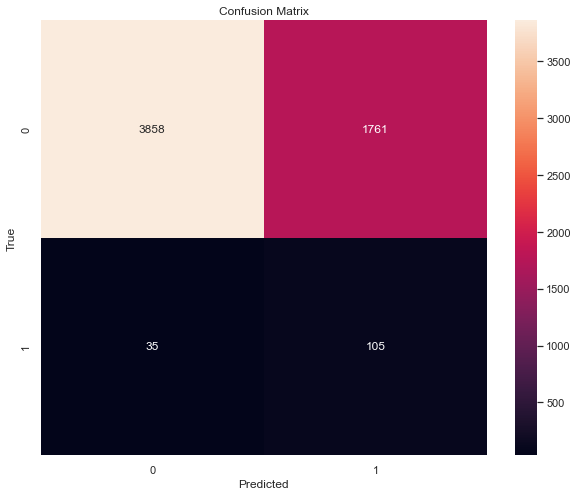

In [128]:
# we plot a confusion matrix to evaluate visually
ax = sns.heatmap(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)), annot=True, fmt="d")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

We see that out of 140 observations of minority class, we were able to detect 105 of them successfully. We found the performance satisfactory and thus decided to save it to use when classifying our Assam Health Survey dataset.

In [129]:
# we see satisfactory performance of our classifier especially in recall(detection) so we save this classifier to use later while working on Assam Health Survey Dataset
stroke_model = clf.best_estimator_
stroke_model.fit(X_res, y_res)

LogisticRegression(C=0.1, solver='liblinear')

#### **Assam Health Survey Dataset**

This dataset is very dirty from the get-go as expected since it was downloaded from the official government website of open data. 
It has a total of 142838 observations from 23 districts of Assam and has a lot of missing, corrupt and irregular information in the dataset that we will need to look out for while working.

All the Assam Health Survey Data are sourced from https://data.gov.in which is the Open Government Data (OGD) Platform of India. The datasets were downloaded with consent from the website which was provided through a form. 

We received 23 datasets for the following 23 districts of Assam:

1. Jorhat
2. Nagaon
3. Golaghat
4. Kamrup
5. Sibsagar
6. Bongaigaon
7. Hailakandi
8. Cachar
9. Barpeta
10. Goalpara
11. Karimganj
12. Tinsukia
13. Dhubri
14. Dhemaji
15. Dibrugarh
16. Karbi Anglong
17. Darrang
18. North Cachar Hills
19. Kokrajhar
20. Lakhimpur
21. Nalbari
22. Marigaon
23. Sonitpur

The datasets came with the following 53 features:
1. state_code
2. district_code
3. rural_urban
4. stratum
5. PSU_ID
6. ahs_house_unit
7. house_hold_no
8. date_survey
9. test_salt_iodine
10. record_code_iodine
11. record_code_iodine_reason
12. sl_no
13. Sex
14. usual_residance
15. usual_residance_Reason
16. identification_code
17. Age_Code
18. Age
19. date_of_birth
20. month_of_birth
21. year_of_birth
22. Weight_measured
23. Weight_in_kg
24. Length_height_measured
25. length_height_code
26. Length_height_cm
27. Haemoglobin_test
28. Haemoglobin
29. Haemoglobin_level
30. BP_systolic
31. BP_systolic_2_reading
32. BP_Diastolic
33. BP_Diastolic_2reading
34. Pulse_rate
35. Pulse_rate_2_reading
36. Diabetes_test
37. fasting_blood_glucose
38. fasting_blood_glucose_mg_dl
39. Marital_status
40. gauna_perfor_not_perfor
41. duration_pregnanacy
42. first_breast_feeding
43. is_cur_breast_feeding
44. day_or_mn_for_breast_feeding_cd
45. day_or_month_for_breast_feeding
46. water_month
47. ani_milk_month
48. semisolid_month_or_day
49. solid_month
50. vegetables_month_or_day
51. illness_type
52. illness_duration
53. treatment_type

In [130]:
# we search for all csv files of each districts from the folder and concat them together into one dataframe
import glob
import os
path = "districts_health_survey_raw"
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df.sample(5)

,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,day_or_mn_for_breast_feeding_cd,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type
14260,ASSAM,CACHAR,Rural,population>=2000,1054676,50,1,13-03-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109945,ASSAM,NAGAON,Rural,population>=2000,1002348,97,1,23-12-13,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60960,ASSAM,HAILAKANDI,Rural,200<population<2000,1072032,15,1,02-08-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94263,ASSAM,KOKRAJHAR,Rural,200<population<2000,1077936,180,1,12-03-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86508,ASSAM,KARIMGANJ,Rural,200<population<2000,1062191,148,2,16-06-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Univariate Stats First Glance

After concatenating all the 23 datasets, we get the following Univariate Stats for all features.

In [131]:
# we call our univariate stats function to get an initial overview of our dataset
func.univarstats(df)

,Dtype,Numeric,Count,Missing,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
sl_no,int64,True,142838,0,30,1,3.1,0,2.0,3.0,4.0,999,3.28,197.67,59812.87
Weight_in_kg,float64,True,117163,25675,1027,50.099998,42.58,0.5,32.099998,46.200001,53.700001,6602.0,25.39,147.04,37996.71
illness_duration,float64,True,1037,141801,18,2.0,2.96,0.0,0.0,2.0,3.0,365.0,12.11,26.76,780.8
identification_code,float64,True,142592,246,4573,2.0,991.58,0.0,322.0,711.0,1247.0,99999.0,2888.68,24.78,693.32
house_hold_no,int64,True,142838,0,57,1,1.3,0,1.0,1.0,1.0,99,2.0,21.19,637.59
ahs_house_unit,int64,True,142838,0,954,1,185.48,1,67.0,148.0,264.0,9111,169.7,8.22,322.4
day_or_month_for_breast_feeding,float64,True,4428,138410,29,6.0,4.75,0.0,4.0,5.0,6.0,79.0,2.55,7.64,177.82
fasting_blood_glucose_mg_dl,float64,True,72166,70672,287,98.0,98.31,50.0,90.0,97.0,103.0,400.0,19.34,5.06,48.43
water_month,float64,True,4413,138425,15,6.0,4.86,0.0,4.0,6.0,7.0,73.0,2.69,2.95,92.63
ani_milk_month,float64,True,4412,138426,16,7.0,5.08,0.0,4.0,6.0,7.0,70.0,3.08,1.62,44.44


#### **Data Cleaning**

First, we filter out our dataset with age range of 30 to 80 years only in accordance to what our classifiers are trained on. We also filter out the observations that do not have the crucial information our classifier will need to classify.
Then, we start exploring and cleaning as we go through all our relevant features.

In [132]:
# we filter by age range of 30 to 80 years as that is where our classification model is trained for ( see note above )
df = df[(df["Age"] >= 30) & (df["Age"] <= 80)]

In [133]:
# we filter out all rows that doesn't have the features that we need for classification
df = df[(df["Weight_in_kg"].notnull()) & (df["Length_height_cm"].notnull())  & (df["BP_systolic"].notnull())  & (df["fasting_blood_glucose_mg_dl"].notnull())]

##### Sex

In [134]:
# we create dummies for "Sex" column
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "Male" else 0)

##### BP Systolic Reading

In our dataset we have two readings for systolic blood pressure. We take the average of both the readings into the main reading or only the first reading if the second reading is null.

In [135]:
# we create a main column for bp sys reading and take avg of the two readings if both are available or else we take only the 1st reading if 2nd reading is missing
df["BP_systolic_2_reading"].fillna("1", inplace=True)
df["BP_systolic_2_reading"] = df["BP_systolic_2_reading"].astype("int")
df["bp_sys_main"] = df.apply(lambda x: x["BP_systolic"] if x["BP_systolic_2_reading"] == 1 else ((x["BP_systolic"])+(x["BP_systolic_2_reading"]))/2 , axis=1)

##### Hypertension

We created a feature hypertension where we classified anyone with BP systolic reading of 140 and above as hypertensive.

In [136]:
# we create a column to classify hypertension from blood pressure measurements
df["hypertension"] = df["bp_sys_main"].apply(lambda x: 1 if x >= 140 else 0)

##### Marital Status

We filled the null values in Marital status with “Never married”. Then, we created a new feature and classified on the basis if a person ever married or not.

In [137]:
# we fill null values in marital status with never married
df["Marital_status"].fillna("Never married", inplace=True)

In [138]:
# we create a column to classify if the respondent ever married
df["ever_married"] = df.apply(lambda x: 0 if (("Never married" in x["Marital_status"]) | ("Not Stated" in x["Marital_status"])) else 1, axis=1)

##### Rural / Urban

In [139]:
# we create dummies for "rural_urban" column
df["rural_urban"] = df["rural_urban"].apply(lambda x: 1 if x == "Urban" else 0)

##### BMI

We remove some corrupted information (Outliers) from our Weight and Height and also some corrupted observations. Then, we proceed forward to feature engineer BMI.

In [140]:
# we filter out outliers in our weights column that can affect our model performance
df = df[(df["Weight_in_kg"] >= df["Weight_in_kg"].quantile(0.01)) & (df["Weight_in_kg"] <= df["Weight_in_kg"].quantile(0.99999))]

In [141]:
# we filter out the outliers from our heights column
df = df[(df["Length_height_cm"] >= df["Length_height_cm"].quantile(0.0003)) & (df["Length_height_cm"] <= df["Length_height_cm"].quantile(0.9999))]

In [142]:
# we detect some discrepencies in some observations with regards to weight and height ( errors while data collection )
df.loc[[56672, 98636, 125074]]

,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,bp_sys_main,hypertension,ever_married
56672,ASSAM,GOLAGHAT,0,population>=2000,1035977,399,1,03-09-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.5,0,0
98636,ASSAM,LAKHIMPUR,0,population>=2000,1136149,230,1,21-12-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.5,0,0
125074,ASSAM,NORTH CACHAR HILLS,1,Urban,1053590,275,1,08-07-14,7,Less than 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.5,1,0


In [143]:
# we remove the observations with the discrepencies
df.drop([56672, 98636, 125074], axis=0, inplace=True)

In [144]:
# we create a BMI (Body Mass Index) feature from weight and height
df["bmi"] = df.apply(lambda x: (x["Weight_in_kg"] / (x["Length_height_cm"] / 100)), axis=1)

In [145]:
# we detect some bmi outliers that can affect model performance and remove them
df = df[df["bmi"] < 95]

##### High Blood Sugar

We classify anyone having glucose level of 120 and above as having High Blood Sugar in accordance with our stroke risk classifier model.

In [146]:
# we create high blood sugar binary classifier in accordance with our stroke classifier model
df["high_blood_sugar"] = df["fasting_blood_glucose_mg_dl"].apply(lambda x: 1 if x >= 120 else 0)

##### Heart Disease Classification

We create a new feature which classifies if the person has higher risk of heart disease with our heart risk classifier model.

In [147]:
# we prepare a dataset to feed into our Heart Disease Risk Classifier ML Model
testdf = df[["Age", "Sex", "high_blood_sugar", "hypertension"]]
testdf.columns = ["Age","Sex","FastingBS","hypertension"] # renamed the columns for the scaler transformation

In [148]:
# we use the scaler from Heart Disease Risk Classifier and scale our dataset
tdf_scaled = scaler.transform(testdf)

In [149]:
# we predict with the heart risk classifier and merge the prediction to main dataframe
pred = heart_model.predict(tdf_scaled)
df["high_risk_heart_disease"] = pred

##### Stroke Risk Classification

We use our stroke risk classifier model for classification. 

In [150]:
# we prepare our dataset to feed into our Stroke Risk Classifier ML Model
df1 = df[["Sex", "Age", "hypertension", "ever_married", "rural_urban", "bmi", "high_blood_sugar", "high_risk_heart_disease"]]
df1.columns = ["gender","age","hypertension","ever_married","Residence_type","bmi","high_blood_sugar","high_risk_heart_disease"] # renamed the columns for the scaler transformation

In [151]:
# we use the scaler from Stroke Risk Classifier and scale our dataset
df1_scaled = scaler1.transform(df1)

We classify everyone with a stroke probability of 60% or more as a high risk of stroke resident and store that information back into dataset for further visual explorations.

In [152]:
# we predict with the probability with stroke risk classifier and merge anyone over 60% probability to main dataframe as high risk
c = []
for i in stroke_model.predict_proba(df1_scaled):
    if i[1] >= 0.6:
        c.append(1)
    else:
        c.append(0)
df["stroke"] = c
vcount = df.stroke.value_counts()
print("Observations of Class 0:", vcount[0])
print("Observations of Class 1:", vcount[1])

Observations of Class 0: 42481
Observations of Class 1: 6508


#### **Data Exploration & Statistical Testing**

##### Rural-Urban Relationship with Stroke Risk Group

We plot the rural or urban feature on the basis of higher risk of stroke group on a bar graph and try to visually explore the information.

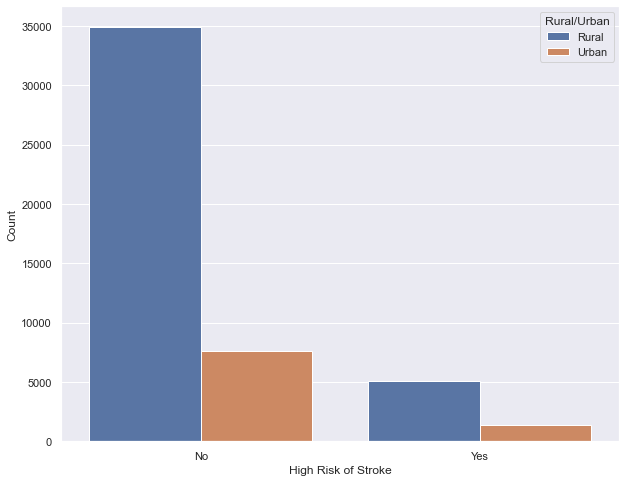

In [153]:
# we plot the rural or urban feature on the basis of stroke group on a bar graph
sns.countplot(x=df["stroke"].apply(lambda x: "Yes" if x == 1 else "No"), hue = df["rural_urban"])
plt.legend(title="Rural/Urban", loc="upper right", labels=["Rural", "Urban"])
plt.xlabel("High Risk of Stroke")
plt.ylabel("Count")
plt.show()

We see that the ratio of observations from rural areas is predominantly higher than urban in our dataset. 
But it is not easy to understand if being from rural or urban has any impact on having higher risk of stroke. Hence, to test this out we do a hypothesis test:

**Null Hypothesis (H0)**: *Being from Rural or Urban has no significant impact on having difference in risk of stroke.*

**Alternate Hypothesis (HA)**: *Being from Rural or Urban has a significant impact on having difference in risk of stroke.*

In [154]:
# we do a t-test to verify if there is any statistical significance
from scipy.stats import ttest_ind

ttest, pvalue = ttest_ind(df[df["rural_urban"] == 0]["stroke"], df[df["rural_urban"] == 1]["stroke"])
print("t-test Result:", np.round(ttest, 3))
print("p-value:", pvalue)

t-test Result: -6.998
p-value: 2.630364143596969e-12


Since, p-value < 0.05 (alpha), we reject the Null Hypothesis (H0) and conclude that being from rural or urban has a statistically significant effect on having difference in risk of stroke.

##### Districts Relationship with Stroke Risk Group

To understand if being from different districts has any statistically significant impact on having higher risk of stroke, we perform a hypothesis test.

**Null Hypothesis (H0)**: *Being from different districts has no significant impact on having higher risk of stroke.*

**Alternate Hypothesis (HA)**: *Being from different districts has significant impact on having higher risk of stroke.*

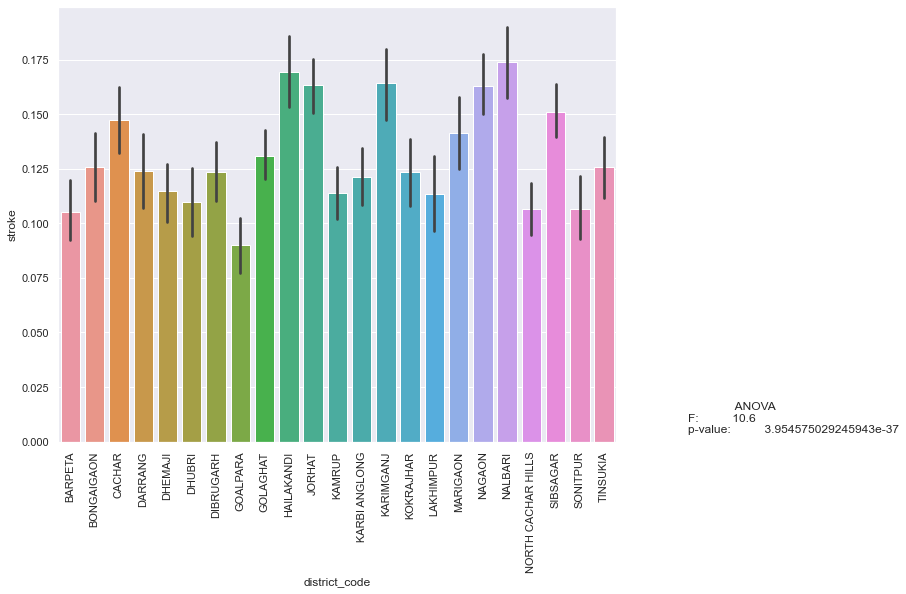

,Stat,+/-,Effect Size,p-value
district_code,F,,10.602,3.954575e-37


In [155]:
# we run our bivarstats function to do a One-Way ANOVA test to verify if there is any statistical significance
func.bivarstats(df[["district_code", "stroke"]], "stroke")

Since, p-value < 0.05 (alpha), we reject the Null Hypothesis (H0) and conclude that being from different districts has a statistically significant effect on having difference in risk of stroke.

We also perform a Tukey's HSD (honestly significant difference) test between each pair of districts to find the pairs that have the most statistically significant effect on having higher risk of stroke.

Top 10 most significant pairs are as follows: 

In [156]:
# we run a tukey hsd test and check top 10 pairs of districts that are most statistically significant
import statsmodels.stats.multicomp as multi 
mc = multi.MultiComparison(df['stroke'], df['district_code'])
Results = mc.tukeyhsd()
tukeydf = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
tukeydf.sort_values("p-adj").head(10)

,group1,group2,meandiff,p-adj,lower,upper,reject
145,GOALPARA,SIBSAGAR,0.0611,0.0,0.0247,0.0974,True
112,DHUBRI,NALBARI,0.0639,0.0,0.0235,0.1044,True
193,KAMRUP,NALBARI,0.0600,0.0,0.0242,0.0959,True
163,HAILAKANDI,KAMRUP,-0.0555,0.0,-0.0914,-0.0196,True
192,KAMRUP,NAGAON,0.0492,0.0,0.0150,0.0833,True
213,KARIMGANJ,NORTH CACHAR HILLS,-0.0575,0.0,-0.0938,-0.0211,True
227,LAKHIMPUR,NALBARI,0.0605,0.0,0.0193,0.1016,True
175,JORHAT,KAMRUP,-0.0494,0.0,-0.0814,-0.0175,True
185,JORHAT,SONITPUR,-0.0567,0.0,-0.0939,-0.0194,True
183,JORHAT,NORTH CACHAR HILLS,-0.0566,0.0,-0.0890,-0.0243,True


##### Salt Iodine Test Values Relationship with Stroke Risk Group

To understand if having different salt iodine test values has any statistically significant impact on having higher risk of stroke, we perform a hypothesis test.

**Null Hypothesis (H0)**: *Having different salt iodine test values has no significant impact on having higher risk of stroke.*

**Alternate Hypothesis (HA)**: *Having different salt iodine test values has a significant impact on having higher risk of stroke.*

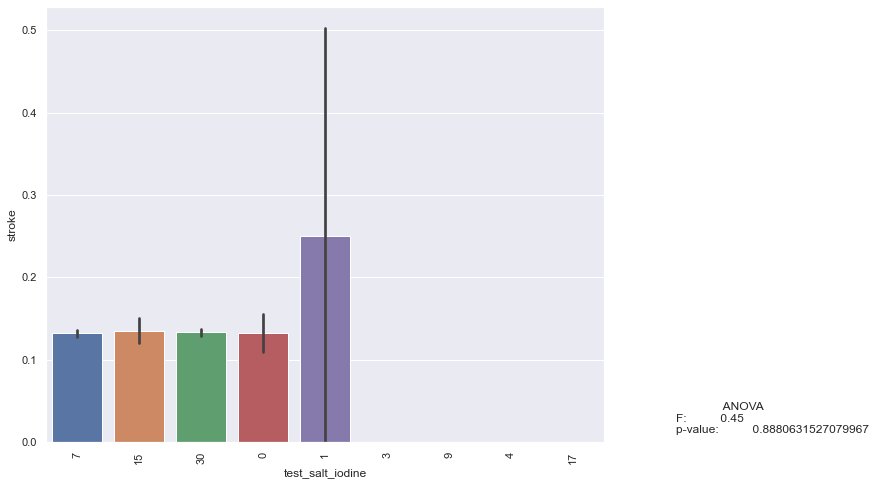

,Stat,+/-,Effect Size,p-value
test_salt_iodine,F,,0.455,0.888063


In [157]:
# we run our bivarstats function to do a One-Way ANOVA test to verify if there is any statistical significance
df["test_salt_iodine"] = df["test_salt_iodine"].astype("str")
func.bivarstats(df[["test_salt_iodine", "stroke"]], "stroke")
# we see that there is no statistical sig diff in having different salt iodine values on stroke risk

Since, p-value > 0.05 (alpha), we fail to reject the Null Hypothesis (H0) and conclude that having different salt iodine test values has no statistically significant effect on having difference in risk of stroke.

We also perform a Tukey's HSD (honestly significant difference) test between each pair to verify our finding and we see that indeed there is no statistical significance.

In [158]:
# we also run a tukey hsd test to verify significance among pairs
mc = multi.MultiComparison(df['stroke'], df['test_salt_iodine'])
Results = mc.tukeyhsd()
tukeydf = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])

if len(tukeydf[tukeydf["reject"] == True]) == 0:
    print("### Tukey HSD Test Performed ### \nTrue values= 0","\nNo pairs with statistical significance on Target label was found.")

### Tukey HSD Test Performed ### 
True values= 0 
No pairs with statistical significance on Target label was found.


##### Record Code Iodine Values Relationship with Stroke Risk Group

To understand if having different record code iodine values has any statistically significant impact on having higher risk of stroke, we perform a hypothesis test.

**Null Hypothesis (H0)**: *Having different record code iodine values has no significant impact on having higher risk of stroke.*

**Alternate Hypothesis (HA)**: *Having different record code iodine values has a significant impact on having higher risk of stroke.*

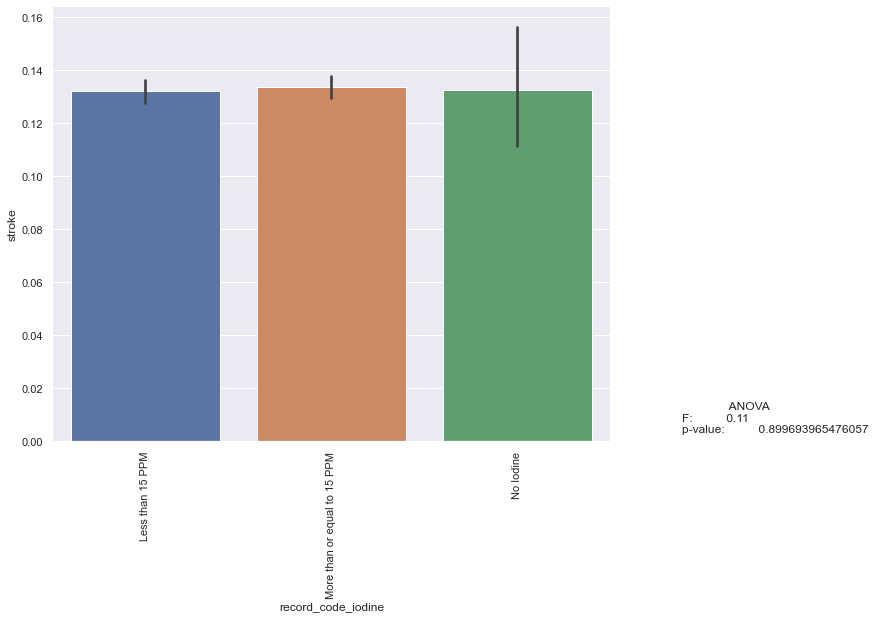

,Stat,+/-,Effect Size,p-value
record_code_iodine,F,,0.106,0.899694


In [159]:
# we run our bivarstats function to do a One-Way ANOVA test to verify if there is any statistical significance
func.bivarstats(df[["record_code_iodine", "stroke"]], "stroke")

Since, p-value > 0.05 (alpha), we fail to reject the Null Hypothesis (H0) and conclude that having different salt iodine test values has no statistically significant effect on having difference in risk of stroke.

We also perform a Tukey's HSD (honestly significant difference) test between each pair to verify our finding and we see that indeed there is no statistical significance.

In [160]:
# we also run a tukey hsd test to verify significance among pairs
mc = multi.MultiComparison(df['stroke'], df['record_code_iodine'])
Results = mc.tukeyhsd()
tukeydf = pd.DataFrame(data=Results._results_table.data[1:], columns=Results._results_table.data[0])
if len(tukeydf[tukeydf["reject"] == True]) == 0:
    print("### Tukey HSD Test Performed ### \nTrue values= 0","\nNo pairs with statistical significance on Target label was found.")

### Tukey HSD Test Performed ### 
True values= 0 
No pairs with statistical significance on Target label was found.


##### Sex Feature Relationship with Stroke Risk Group

We plot the sex feature on the basis of higher risk of stroke group on a bar graph and try to visually explore the information.

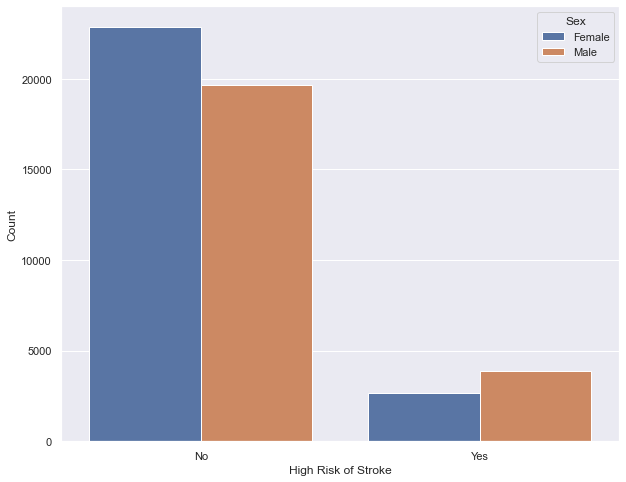

In [161]:
# we plot the sex feature on the basis of stroke group on a bar graph
sns.countplot(x=df["stroke"].apply(lambda x: "Yes" if x == 1 else "No"), hue = df["Sex"])
plt.legend(title="Sex", loc="upper right", labels=["Female", "Male"])
plt.xlabel("High Risk of Stroke")
plt.ylabel("Count")
plt.show()

We see that the ratio of observations of male and female are pretty balanced in our dataset. 
We can also see that males are more likely to be in stroke risk category compared to females. To further verify this, we do a hypothesis test:

**Null Hypothesis (H0)**: *Being Male or Female has no significant impact on having difference in risk of stroke.*

**Alternate Hypothesis (HA)**: *Being Male or Female has a significant impact on having difference in risk of stroke.*

In [162]:
# we do a t-test to verify if there is any statistical significance
from scipy.stats import ttest_ind

ttest, pvalue = ttest_ind(df[df["Sex"] == 0]["stroke"], df[df["Sex"] == 1]["stroke"])
print("t-test Result:", np.round(ttest, 3))
print("p-value:", pvalue)

t-test Result: -19.878
p-value: 1.3997568200884904e-87


Since, p-value < 0.05 (alpha), we reject the Null Hypothesis (H0) and conclude that being male or female has a statistically significant effect on having a difference in risk of stroke.

##### Haemoglobin Level Relationship with Stroke Risk Group

To understand if having difference in haemoglobin level values has any statistically significant impact on having difference in risk of stroke, we perform a hypothesis test.

**Null Hypothesis (H0)**: *Having different haemoglobin levels has no significant impact on having higher risk of stroke.*

**Alternate Hypothesis (HA)**: *Having different haemoglobin levels has a significant impact on having higher risk of stroke.*

In [163]:
# we do a One-Way ANOVA test to check for statistical significance between haemoglobin level and diff in risk of stroke
fstat, pvalue = func.anova(df[df["Haemoglobin_level"].notnull()], "Haemoglobin_level", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", np.round(pvalue, 3))

F-Stat Effect Size: 1.005 
p-value: 0.459


Since, p-value > 0.05 (alpha), we fail to reject the Null Hypothesis (H0) and conclude that having difference in haemoglobin values has no statistically significant effect on having a difference in risk of stroke.

##### Diastolic Blood Pressure Relationship with Stroke Risk Group

To understand if having difference in Diastolic BP level values has any statistically significant impact on having difference in risk of stroke, we perform a hypothesis test.

**Null Hypothesis (H0)**: *Having different diastolic BP levels has no significant impact on having higher risk of stroke.*

**Alternate Hypothesis (HA)**: *Having different diastolic BP levels has a significant impact on having higher risk of stroke.*

In [164]:
# we do a One-Way ANOVA test to check for statistical significance between diastolic BP level and diff in risk of stroke
fstat, pvalue = func.anova(df[df["BP_Diastolic"].notnull()], "BP_Diastolic", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", pvalue)

F-Stat Effect Size: 15.004 
p-value: 7.134994043528881e-275


Since, p-value < 0.05 (alpha), we reject the Null Hypothesis (H0) and conclude that having a difference in diastolic BP values has a statistically significant effect on having a difference in risk of stroke.

##### Pulse Rate Relationship with Stroke Risk Group

To understand if having difference in Pulse Rate values has any statistically significant impact on having difference in risk of stroke, we perform a hypothesis test.

**Null Hypothesis (H0)**: *Having different Pulse Rate values has no significant impact on having higher risk of stroke.*

**Alternate Hypothesis (HA)**: *Having different Pulse Rate values has a significant impact on having higher risk of stroke.*

In [165]:
# we do a One-Way ANOVA test to check for statistical significance between pulse rate and diff in risk of stroke
fstat, pvalue = func.anova(df[df["Pulse_rate"].notnull()], "Pulse_rate", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", pvalue)

F-Stat Effect Size: 2.824 
p-value: 1.0294717411871078e-18


Since, p-value < 0.05 (alpha), we reject the Null Hypothesis (H0) and conclude that having a difference in Pulse Rate values has a statistically significant effect on having a difference in risk of stroke.

We also checked the same hypothesis with the 2nd Pulse Reading that was provided in the dataset and came to the same conclusion. The results were:

In [166]:
# we do a One-Way ANOVA test to check for statistical significance between pulse rate 2nd reading and diff in risk of stroke
fstat, pvalue = func.anova(df[df["Pulse_rate_2_reading"].notnull()], "Pulse_rate_2_reading", "stroke")
print("F-Stat Effect Size:", np.round(fstat, 3), "\np-value:", pvalue)

F-Stat Effect Size: 2.348 
p-value: 1.370320457691074e-12


#### **Conclusion**

We export our Dataset of individuals who are classified to be in higher risk of stroke category to an excel file named “output_data_stroke.xlsx” with the following features:

* Unique ID
* Sex
* District


In [167]:
# we prepare the final dataset to export with classified people who are at higher risk of stroke
df_final = df[df["stroke"] == 1]

In [168]:
# we create the dataframe to export and check a sample before exporting
exportdf = pd.DataFrame({"Unique ID":df_final["PSU_ID"],"Sex":df_final["Sex"].apply(lambda x: "Male" if x == 1 else "Female"), "District":df_final["district_code"]})
exportdf.sample(3)

,Unique ID,Sex,District
119757,1113336,Male,NALBARI
109107,1006719,Male,NAGAON
117075,1112188,Female,NALBARI


In [171]:
# we export the data to an excel file in accordance to our project objective
exportdf.to_excel("output_data_stroke.xlsx", index=False)

We see that our dataset is classified successfully in accordance to our Project objective so we decide to conclude our project here.